# Домашнее задание 8

# Тема “Система линейных алгебраичсеких уравнений”

### Решите линейную систему

In [2]:
import numpy as np

In [4]:
A = np.array([[1, 2, 3],
              [4, 0, 6],
              [7, 8, 9]])

In [5]:
b = np.array([12, 2, 1])

In [9]:
np.linalg.matrix_rank(A)

3

In [11]:
B = np.array([[1, 2, 3, 12],
              [4, 0, 6, 2],
              [7, 8, 9, 1]])

In [12]:
np.linalg.matrix_rank(B)

3

In [ ]:
# Ранг исходной матрицы равен рангу расширенной матрицы, поэтому решение есть

In [6]:
np.linalg.solve(A, b)

array([-9.2       ,  0.9       ,  6.46666667])

### Найдите псевдорешение

In [14]:
A = np.array([[1, 2, -1],
              [3, -4, 0],
              [8, -5, 2],
              [2, 0, -5],
              [11, 4, -7]])

In [15]:
b = np.array([1, 7, 12, 7, 15])

In [16]:
np.linalg.matrix_rank(A)

3

In [17]:
B = np.array([[1, 2, -1, 1],
              [3, -4, 0, 7],
              [8, -5, 2, 12],
              [2, 0, -5, 7],
              [11, 4, -7, 15]])

In [18]:
np.linalg.matrix_rank(B)

4

In [19]:
# Ранг исходной матрицы меньше ранга расширенной матрицы, поэтому точных решений нет. Ищем псевдорешения

In [32]:
np.linalg.lstsq(A, b)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

### Сколько решений имеет линейная система

In [50]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

In [51]:
b = np.array([12, 2, 1])

In [52]:
np.linalg.matrix_rank(A)

2

In [42]:
B = np.array([[1, 2, 3, 12],
              [4, 5, 6, 2],
              [7, 8, 9, 1]])

In [43]:
np.linalg.matrix_rank(B)

3

In [ ]:
# Ранг исходной матрицы меньше ранга расширенной матрицы, поэтому точных решений нет.

In [44]:
#  Метод расходится

np.linalg.solve(A, b)

array([ 2.83726777e+16, -5.67453553e+16,  2.83726777e+16])

Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 

In [65]:
# Изменим вектор правой части так, чтобы ранг расширенной матрицы был равен 2

b = np.array([3, 2, 1])

B = np.array([[1, 2, 3, 3],
              [4, 5, 6, 2],
              [7, 8, 9, 1]])

np.linalg.matrix_rank(B)

2

In [67]:
# Решение есть

np.linalg.solve(A, b)

array([ 0.33333333, -4.66666667,  4.        ])

### Вычислите LU-разложение матрицы

In [68]:
A = np.array([[1, 2, 3],
              [2, 16, 21],
              [4, 28, 73]])

In [73]:
def decompose_to_LU(a):
    """Decompose matrix of coefficients to L and U matrices.
     L and U triangular matrices will be represented in a single nxn matrix.
    :param a: numpy matrix of coefficients
    :return: numpy LU matrix
    """
    # create emtpy LU-matrix
    lu_matrix = np.matrix(np.zeros([a.shape[0], a.shape[1]]))
    n = a.shape[0]

    for k in range(n):
        # calculate all residual k-row elements
        for j in range(k, n):
            lu_matrix[k, j] = a[k, j] - lu_matrix[k, :k] * lu_matrix[:k, j]
        # calculate all residual k-column elemetns
        for i in range(k + 1, n):
            lu_matrix[i, k] = (a[i, k] - lu_matrix[i, : k] * lu_matrix[: k, k]) / lu_matrix[k, k]

    return lu_matrix

In [74]:
decompose_to_LU(A)

matrix([[ 1.        ,  2.        ,  3.        ],
        [ 2.        , 12.        , 15.        ],
        [ 4.        ,  1.66666667, 36.        ]])

In [75]:
def get_L(m):
    """Get triangular L matrix from a single LU-matrix
    :param m: numpy LU-matrix
    :return: numpy triangular L matrix
    """
    L = m.copy()
    for i in range(L.shape[0]):
            L[i, i] = 1
            L[i, i+1 :] = 0
    return np.matrix(L)


def get_U(m):
    """Get triangular U matrix from a single LU-matrix
    :param m: numpy LU-matrix
    :return: numpy triangular U matrix
    """
    U = m.copy()
    for i in range(1, U.shape[0]):
        U[i, :i] = 0
    return U

In [77]:
LU = decompose_to_LU(A)
L = get_L(LU)
U = get_U(LU)

L * U

matrix([[ 1.,  2.,  3.],
        [ 2., 16., 21.],
        [ 4., 28., 73.]])

In [106]:
L

matrix([[1.        , 0.        , 0.        ],
        [2.        , 1.        , 0.        ],
        [4.        , 1.66666667, 1.        ]])

In [107]:
U

matrix([[ 1.,  2.,  3.],
        [ 0., 12., 15.],
        [ 0.,  0., 36.]])

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [100]:
b = np.array([1, 2, 3])

In [101]:
np.linalg.solve(A, b)

array([ 1.01388889,  0.03472222, -0.02777778])

### Найдите нормальное псевдорешение недоопределенной системы

### Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум

In [110]:
A = np.array([[1, 2, -1],
              [8, -5, 2]])
b = np.array([1, 12])

In [ ]:
# Решение встроенным методом

In [112]:
np.linalg.lstsq(A, b)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

In [ ]:
# Решение вручную

In [180]:
X = []
Y = []
Z = []
Q = []
z = -0.05
for i in range(20):
    x = 1/21*(z + 29)
    y = 5/21*(2*z - 0.8)
    q = np.sqrt(x*x + y*y + z*z)
    X.append(x)
    Y.append(y)
    Z.append(z)
    Q.append(q)
    z += 0.01

In [181]:
import matplotlib.pyplot as plt

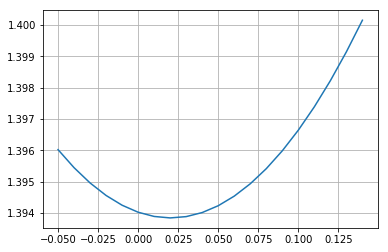

In [182]:
plt.plot(Z,Q)
plt.grid(True)

In [140]:
Q

[6.446887487512403,
 6.445507532145065,
 6.4441463532590735,
 6.442803962755217,
 6.4414803723798695,
 6.4401755937244864,
 6.438889638225106,
 6.437622517161858,
 6.436374241658482,
 6.435144822681839,
 6.433934271041446,
 6.432742597389003,
 6.43156981221794,
 6.430415925862948,
 6.429280948499546,
 6.4281648901436315,
 6.427067760651042,
 6.4259895697171325,
 6.424930326876348,
 6.423890041501809,
 6.4228687228049015,
 6.421866379834877,
 6.420883021478448,
 6.419918656459406,
 6.418973293338239,
 6.4180469405117515,
 6.417139606212691,
 6.4162512985094,
 6.4153820253054485,
 6.414531794339284,
 6.413700613183901,
 6.4128884892464955,
 6.412095429768144,
 6.411321441823478,
 6.410566532320379,
 6.40983070799966,
 6.409113975434777,
 6.408416341031534,
 6.407737811027795,
 6.40707839149321,
 6.406438088328945,
 6.405816907267417,
 6.4052148538720415,
 6.4046319335369795,
 6.4040681514869044,
 6.403523512776759,
 6.40299802229154,
 6.402491684746074,
 6.402004504684804,
 6.40153648648

In [ ]:
# Q достигает минимума при z = 0,02

In [183]:
x = 1/21*((-0.02) + 29)
y = 5/21*(2*(-0.02) - 4/5)

In [184]:
x

1.38

In [185]:
y

-0.2

In [186]:
# Решения сходятся

 ### Найдите одно из псевдорешений вырожденной системы

In [187]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

b = np.array([2, 5, 11])

In [188]:
B = np.array([[1, 2, 3, 2],
              [4, 5, 6, 5],
              [7, 8, 9, 11]])

In [189]:
np.linalg.matrix_rank(A)

2

In [190]:
np.linalg.matrix_rank(B)

3

In [191]:
# Система несовместна, то есть точных решений нет

In [193]:
# Нормальное псевдорешение

np.linalg.lstsq(A, b)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))